# **Hoja de Trabajo 2**

Paula Barillas - 22764
Mónica Salvatierra - 22249

## **Link del Repositorio**

https://github.com/alee2602/HDT2-DM

### **Importar las librerías a utilizar**

In [23]:
import pandas as pd
#from pandas_profiling import ProfileReport   # para versiones Python < 3.11
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


### **Leer archivo de datos**

In [24]:
data = pd.read_csv("iris.csv")

### **Obtener las primeros 10 observaciones**

In [25]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### **Verificar el tipo de variables que estamos tratando**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**A partir de esta información, podemos decir lo siguiente:**

- No existen valores faltantes
- Las 4 variables son numéricas, por lo que no necesitamos codificarlas ni estandarizar el nombre de nuestras columnas

### **Obtener estadísticas de las variables**

In [27]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observamos que los valores no se encuentran muy dispersos, por lo que por el momento no consideramos necesario realizar una normalización de los datos,**

## **Sección 1**

**Visualizaremos los datos para verificar si se pueden distinguir algunos grupos**

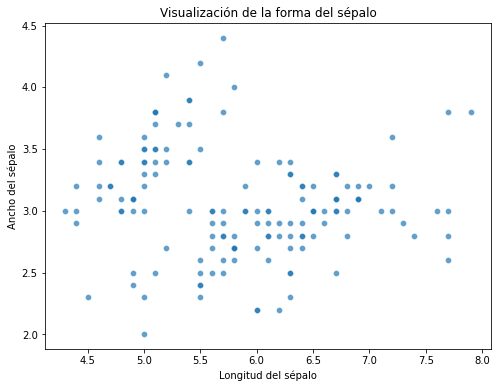

In [28]:
# Visualización de la forma del sépalo
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["sepal_length"], y=data["sepal_width"], alpha=0.7)
plt.xlabel("Longitud del sépalo")
plt.ylabel("Ancho del sépalo")
plt.title("Visualización de la forma del sépalo")
plt.show()


**A continuación se crearán 2 clusters por medio del algoritmo de K-Means Clustering**

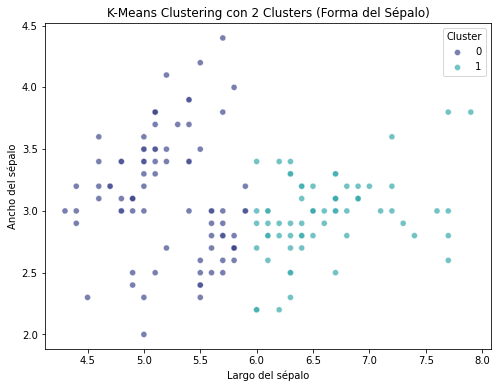

In [29]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data["cluster_2"] = kmeans.fit_predict(data[["sepal_length", "sepal_width"]])

# Graficar los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["sepal_length"], y=data["sepal_width"], hue=data["cluster_2"], palette="mako", alpha=0.7)
plt.xlabel("Largo del sépalo")
plt.ylabel("Ancho del sépalo")
plt.title("K-Means Clustering con 2 Clusters (Forma del Sépalo)")
plt.legend(title="Cluster")
plt.show()

**Mostrar la cantidad de observaciones en cada cluster**

In [30]:

contador_cluster = data["cluster_2"].value_counts().sort_index()

print("Cantidad de puntos en cada cluster:")
print(contador_cluster)


Cantidad de puntos en cada cluster:
cluster_2
0    83
1    67
Name: count, dtype: int64


**Estandarizaremos los datos para verificar si existe alguna diferencia en los clusters**

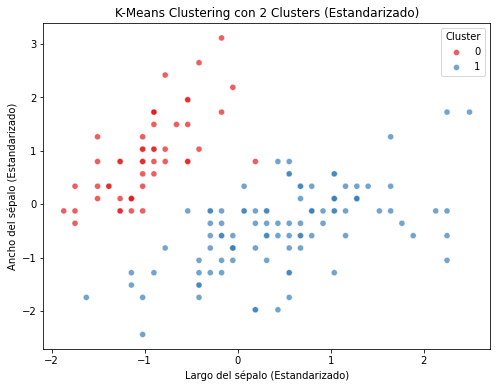

In [31]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
standarized_data = data.copy()
standarized_data[["sepal_length", "sepal_width"]] = scaler.fit_transform(data[["sepal_length", "sepal_width"]])

# Aplicar K-Means nuevamente con datos estandarizados
kmeans_std = KMeans(n_clusters=2, random_state=42, n_init=10)
standarized_data["cluster_2"] = kmeans_std.fit_predict(standarized_data[["sepal_length", "sepal_width"]])

# Graficar los resultados después de la estandarización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=standarized_data["sepal_length"], y=standarized_data["sepal_width"], hue=standarized_data["cluster_2"], palette="Set1", alpha=0.7)
plt.xlabel("Largo del sépalo (Estandarizado)")
plt.ylabel("Ancho del sépalo (Estandarizado)")
plt.title("K-Means Clustering con 2 Clusters (Estandarizado)")
plt.legend(title="Cluster")
plt.show()


**Mostrar la cantidad de observaciones en cada cluster**

In [32]:
# Contar la cantidad de puntos en cada cluster después de la estandarización
cluster_counts_std = standarized_data["cluster_2"].value_counts().sort_index()

print("Cantidad de puntos en cada cluster después de la estandarización:")
print(cluster_counts_std)


Cantidad de puntos en cada cluster después de la estandarización:
cluster_2
0     50
1    100
Name: count, dtype: int64


Existe una diferencia en la clasificación de las observaciones dentro de los clusters. Como se observa, en los datos sin escalar, hay 83 observaciones que se clasifican dentro del cluster 0, mientras las 67 observaciones restantes se encuentran en el cluster 1. No obstante, cuando se estandarizaron los datos, la cantidad de observaciones en cada cluster cambió. En el cluster 0 descendió a 50 observaciones, mientras el cluster 1 ahora tiene 100 observaciones.

**Método del codo**

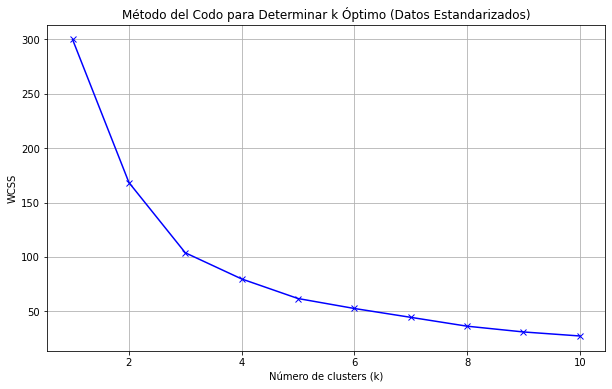

In [33]:
scaler = StandardScaler()
standarized_data = data.copy()
standarized_data[["sepal_length", "sepal_width"]] = scaler.fit_transform(data[["sepal_length", "sepal_width"]])

# Inicializar lista para almacenar WCSS
wcss = []

# Definir el rango de valores de k
K = range(1, 11)

# Calcular WCSS para cada valor de k utilizando los datos estandarizados
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(standarized_data[["sepal_length", "sepal_width"]])
    wcss.append(kmeans.inertia_)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para Determinar k Óptimo (Datos Estandarizados)')
plt.grid(True)
plt.show()

A partir de la gráfica, podemos decir que el valor ideal para la cantidad de clusters es de 3, puesto que a partir de ese valor, el wcss para cada valor empieza a disminuir a comparación de los primeros dos valores. 

**Graficas de resultados con números diferentes de clusters**

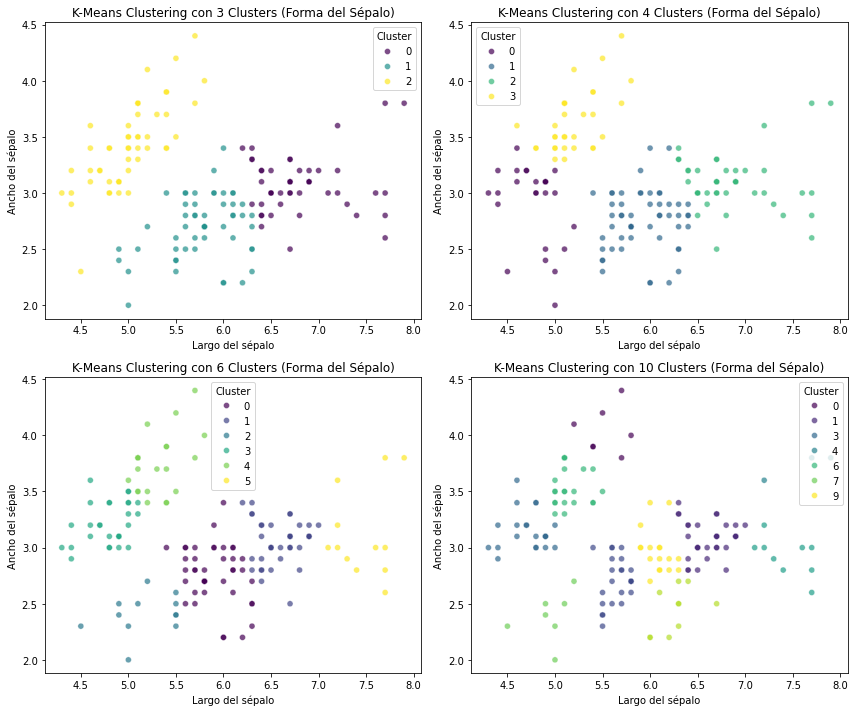

In [42]:
standarized_data[["sepal_length", "sepal_width"]] = scaler.fit_transform(data[["sepal_length", "sepal_width"]])
# Definir los valores de k a graficar
selected_k = [3, 4, 6, 10]

# Graficar los resultados para diferentes números de clusters
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
axes = axes.flatten()  

for i, k in enumerate(selected_k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    data[f"cluster_{k}"] = kmeans.fit_predict(data[["sepal_length", "sepal_width"]])
    
    sns.scatterplot(x=data["sepal_length"], y=data["sepal_width"], hue=data[f"cluster_{k}"], palette="viridis", alpha=0.7, ax=axes[i])
    axes[i].set_xlabel("Largo del sépalo")
    axes[i].set_ylabel("Ancho del sépalo")
    axes[i].set_title(f"K-Means Clustering con {k} Clusters (Forma del Sépalo)")
    axes[i].legend(title="Cluster")

plt.tight_layout()
plt.show()

Tomando en cuenta el valor de k ideal que obtuvimos para la forma del sépalo de manera manual, esto coincide con la cantidad de especies que existen en el dataset original.

## **Sección 2**

**Visualización de datos para verificar si se pueden distinguir algunos grupos**

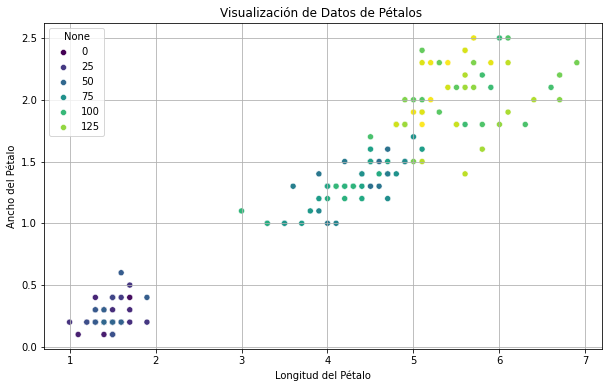

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="petal_length", y="petal_width", data=data, palette="viridis", hue=data.index)
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Visualización de Datos de Pétalos ')
plt.grid(True)
plt.show()

**Creación de 2 clusters por medio del algoritmo de K-Means Clustering**

Cantidad de puntos en cada cluster:
cluster
0    99
1    51
Name: count, dtype: int64


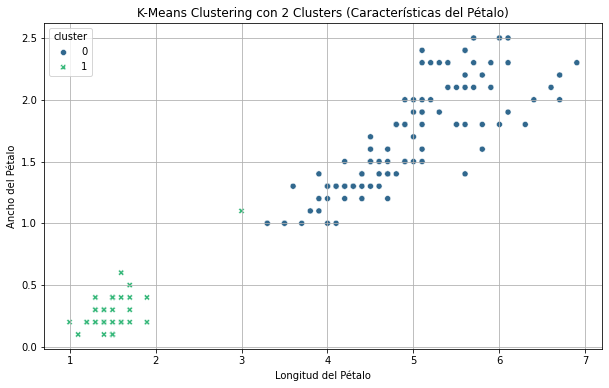

In [36]:

# Modelo de K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(data[["petal_length", "petal_width"]])

# Cantidad de puntos en cada cluster
cluster_counts = data['cluster'].value_counts()
print("Cantidad de puntos en cada cluster:")
print(cluster_counts)

# Crear un gráfico de dispersión de las características del pétalo con la paleta "viridis"
plt.figure(figsize=(10, 6))
sns.scatterplot(x="petal_length", y="petal_width", data=data, palette="viridis", hue="cluster", style="cluster")
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('K-Means Clustering con 2 Clusters (Características del Pétalo)')
plt.grid(True)
plt.show()

**Estandarización  de los datos**

Cantidad de puntos en cada cluster (datos estandarizados):
cluster_scaled
0    100
1     50
Name: count, dtype: int64


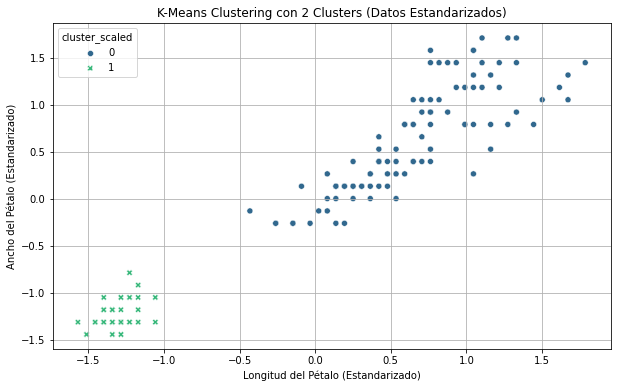

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["petal_length", "petal_width"]])

#Modelo de K-Means con 2 clusters en los datos estandarizados
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['cluster_scaled'] = kmeans.fit_predict(data_scaled)

# Cantidad de puntos en cada cluster
cluster_counts_scaled = data['cluster_scaled'].value_counts()
print("Cantidad de puntos en cada cluster (datos estandarizados):")
print(cluster_counts_scaled)

# Gráfico de dispersión de las características del pétalo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['cluster_scaled'], palette="viridis", style=data['cluster_scaled'])
plt.xlabel('Longitud del Pétalo (Estandarizado)')
plt.ylabel('Ancho del Pétalo (Estandarizado)')
plt.title('K-Means Clustering con 2 Clusters (Datos Estandarizados)')
plt.grid(True)
plt.show()

Observando el grafico y el resultado de la cantidad de puntos, si se observa una diferencia

**Método del codo**

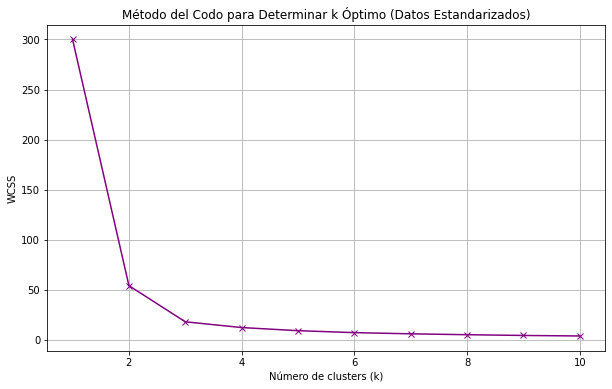

In [38]:
# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["petal_length", "petal_width"]])

# Lista para almacenar WCSS
wcss = []
# Rango de valores de k
K = range(1, 11)

# Calcular WCSS para cada valor de k utilizando los datos estandarizados
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, marker='x', linestyle='-', color='purple')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para Determinar k Óptimo (Datos Estandarizados)')
plt.grid(True)
plt.show()

**Gráfico de valores número de clusters**

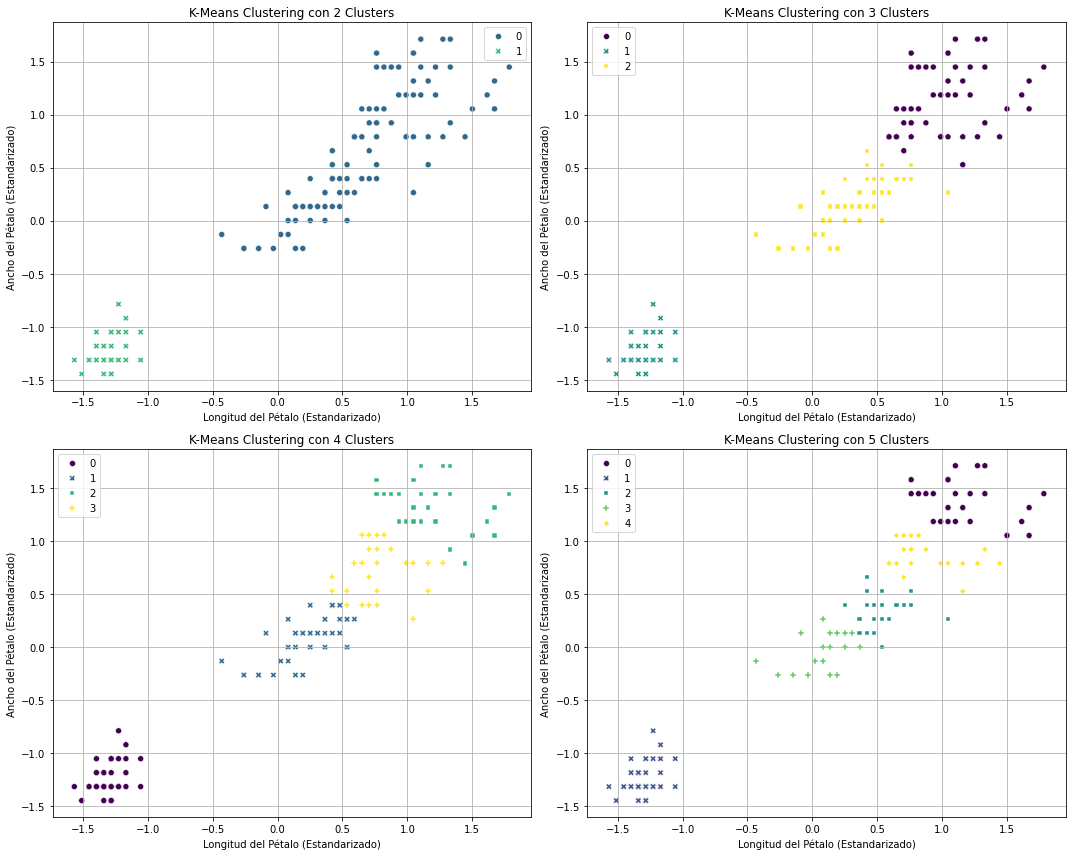

In [39]:
data_scaled = scaler.fit_transform(data[["petal_length", "petal_width"]])

# Definir el rango de valores de k a probar (basado en la gráfica del codo)
k_values = [2, 3, 4, 5]

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Ajustar el modelo de K-Means y graficar los resultados para cada valor de k
for ax, k in zip(axes.flatten(), k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_scaled)
    data[f'cluster_{k}'] = clusters
    
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette="viridis", ax=ax, style=clusters)
    ax.set_title(f'K-Means Clustering con {k} Clusters')
    ax.set_xlabel('Longitud del Pétalo (Estandarizado)')
    ax.set_ylabel('Ancho del Pétalo (Estandarizado)')
    ax.grid(True)

plt.tight_layout()
plt.show()

## **Sección 3**

**Importación de la librería Kneed**

In [40]:

from kneed import KneeLocator

El número óptimo de clusters según kneed es: 3


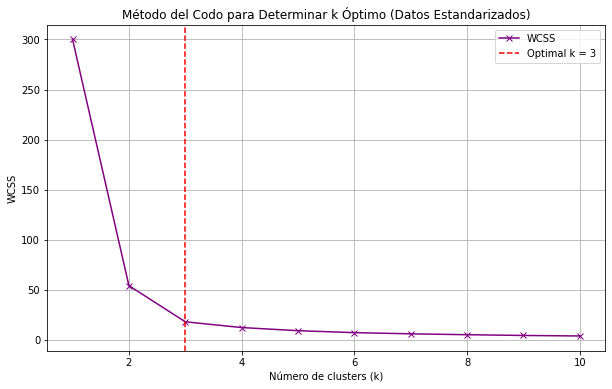

In [41]:

# Utilizar kneed para encontrar el punto de inflexión
kneedle = KneeLocator(K, wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print(f"El número óptimo de clusters según kneed es: {optimal_k}")

# Comparar con el método del codo manual
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, marker='x', linestyle='-', color='purple', label='WCSS')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para Determinar k Óptimo (Datos Estandarizados)')
plt.legend()
plt.grid(True)
plt.show()

Observando el gráfico, en este caso el gráfico elaborado manualmente del método del codo y usando la librería Kneed, si nos dio el mismo resultado con respecto número correcto de clusters.